In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('/Volumes/Macintosh HD/Users/howard/Dropbox/Work/12_Teaching/20200420_ESCP/2425/2425-Term2_Fall/01-Courses/MBD41/03-Demo/2425MBD41_Demo_Data.xlsx',
                   sheet_name='Current Applications')

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,ORGANIZATION_TYPE
0,267142,0,Cash loans,F,49500.0,473760.0,Secondary / secondary special,-23768,NaN,XNA
1,344230,0,Revolving loans,F,103500.0,180000.0,Incomplete higher,-10346,Core staff,Business Entity Type 3
2,205422,0,Cash loans,M,202500.0,904608.0,Secondary / secondary special,-19321,Drivers,Self-employed
3,103524,0,Cash loans,M,112500.0,220500.0,Secondary / secondary special,-14489,Laborers,Other
4,196457,0,Cash loans,M,112500.0,454500.0,Secondary / secondary special,-10423,NaN,Mobile


In [6]:
# - x / 365
df['AGE'] = df['DAYS_BIRTH'].apply(lambda x: int(- x / 365))

In [7]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,ORGANIZATION_TYPE,AGE
0,267142,0,Cash loans,F,49500.0,473760.0,Secondary / secondary special,-23768,NaN,XNA,65
1,344230,0,Revolving loans,F,103500.0,180000.0,Incomplete higher,-10346,Core staff,Business Entity Type 3,28
2,205422,0,Cash loans,M,202500.0,904608.0,Secondary / secondary special,-19321,Drivers,Self-employed,52
3,103524,0,Cash loans,M,112500.0,220500.0,Secondary / secondary special,-14489,Laborers,Other,39
4,196457,0,Cash loans,M,112500.0,454500.0,Secondary / secondary special,-10423,NaN,Mobile,28


In [11]:
df['AGE2'] = (- df['DAYS_BIRTH'] / 365).astype(int)

In [12]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,ORGANIZATION_TYPE,AGE,AGE2
0,267142,0,Cash loans,F,49500.0,473760.0,Secondary / secondary special,-23768,NaN,XNA,65,65
1,344230,0,Revolving loans,F,103500.0,180000.0,Incomplete higher,-10346,Core staff,Business Entity Type 3,28,28
2,205422,0,Cash loans,M,202500.0,904608.0,Secondary / secondary special,-19321,Drivers,Self-employed,52,52
3,103524,0,Cash loans,M,112500.0,220500.0,Secondary / secondary special,-14489,Laborers,Other,39,39
4,196457,0,Cash loans,M,112500.0,454500.0,Secondary / secondary special,-10423,NaN,Mobile,28,28


In [13]:
df.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].mean()

CODE_GENDER
F    154952.879545
M    194010.419178
Name: AMT_INCOME_TOTAL, dtype: float64

In [16]:
df.groupby(['CODE_GENDER', 'NAME_CONTRACT_TYPE'])['AMT_INCOME_TOTAL'].mean()

CODE_GENDER  NAME_CONTRACT_TYPE
F            Cash loans            155792.572150
             Revolving loans       147437.841709
M            Cash loans            195810.554545
             Revolving loans       177037.714286
Name: AMT_INCOME_TOTAL, dtype: float64

In [21]:
df.groupby(['CODE_GENDER', 'NAME_CONTRACT_TYPE']).agg({'AMT_INCOME_TOTAL': ['mean', 'std'],
                                                       'AGE': ['mean', 'min', 'max']})

AMT_INCOME_TOTAL                       AGE      \
                                           mean            std       mean min   
CODE_GENDER NAME_CONTRACT_TYPE                                                  
F           Cash loans            155792.572150   88224.096945  45.306008  21   
            Revolving loans       147437.841709   73293.779369  39.497487  21   
M           Cash loans            195810.554545  106303.917420  41.403030  21   
            Revolving loans       177037.714286   88946.714399  39.552381  21   

                                    
                               max  
CODE_GENDER NAME_CONTRACT_TYPE      
F           Cash loans          68  
            Revolving loans     64  
M           Cash loans          68  
            Revolving loans     62

In [22]:
# df['AMT_INCOME_TOTAL'].apply(lambda x: ...)
df.groupby('CODE_GENDER').apply(lambda d: d['AMT_INCOME_TOTAL'].sum() / d['AMT_CREDIT'].sum())

CODE_GENDER
F    0.258543
M    0.319792
dtype: float64

In [23]:
df.groupby('OCCUPATION_TYPE').apply(lambda d: d['AMT_INCOME_TOTAL'].sum() / d['AMT_CREDIT'].sum())

OCCUPATION_TYPE
Accountants              0.294213
Cleaning staff           0.257074
Cooking staff            0.247892
Core staff               0.269272
Drivers                  0.308815
HR staff                 0.158963
High skill tech staff    0.328333
IT staff                 0.442099
Laborers                 0.288492
Low-skill Laborers       0.361658
Managers                 0.341083
Medicine staff           0.219350
Private service staff    0.290922
Realty agents            0.292142
Sales staff              0.256688
Secretaries              0.207970
Security staff           0.283087
Waiters/barmen staff     0.223146
dtype: float64

In [25]:
df.pivot_table(index='CODE_GENDER',
               columns='NAME_CONTRACT_TYPE',
               values='AMT_INCOME_TOTAL',
               aggfunc='mean')

NAME_CONTRACT_TYPE,Cash loans,Revolving loans
CODE_GENDER,,
F,155792.572150,147437.841709
M,195810.554545,177037.714286


In [26]:
df2 = pd.read_excel('/Volumes/Macintosh HD/Users/howard/Dropbox/Work/12_Teaching/20200420_ESCP/2425/2425-Term2_Fall/01-Courses/MBD41/03-Demo/2425MBD41_Demo_Data.xlsx',
                    sheet_name='Previous Applications')

In [27]:
df2.head()

,SK_ID_CURR,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON
0,267142,2083552,Cash loans,270000.0,277308.0,XNA,Approved,XAP
1,267142,1539817,Consumer loans,257175.0,257175.0,XAP,Approved,XAP
2,344230,1598761,Consumer loans,30177.0,24138.0,XAP,Approved,XAP
3,344230,1156937,Consumer loans,246600.0,246600.0,XAP,Approved,XAP
4,205422,1080609,Consumer loans,18135.0,16861.5,XAP,Approved,XAP


In [31]:
df1s = df[['SK_ID_CURR', 'CODE_GENDER', 'AMT_CREDIT']].head(10)
df1s

,SK_ID_CURR,CODE_GENDER,AMT_CREDIT
0,267142,F,473760.0
1,344230,F,180000.0
2,205422,M,904608.0
3,103524,M,220500.0
4,196457,M,454500.0
5,399761,F,240660.0
6,189184,F,1120500.0
7,454087,M,312768.0
8,172131,M,1086786.0
9,159157,M,497520.0


In [33]:
df2s = df2[['SK_ID_CURR', 'AMT_CREDIT']].head(5)
df2s

,SK_ID_CURR,AMT_CREDIT
0,267142,277308.0
1,267142,257175.0
2,344230,24138.0
3,344230,246600.0
4,205422,16861.5


In [36]:
pd.concat([df1s, df2s], axis=0)

,SK_ID_CURR,CODE_GENDER,AMT_CREDIT
0,267142,F,473760.0
1,344230,F,180000.0
2,205422,M,904608.0
3,103524,M,220500.0
4,196457,M,454500.0
5,399761,F,240660.0
6,189184,F,1120500.0
7,454087,M,312768.0
8,172131,M,1086786.0
9,159157,M,497520.0


In [35]:
pd.concat([df1s, df2s], axis=1)

,SK_ID_CURR,CODE_GENDER,AMT_CREDIT,SK_ID_CURR,AMT_CREDIT
0,267142,F,473760.0,267142.0,277308.0
1,344230,F,180000.0,267142.0,257175.0
2,205422,M,904608.0,344230.0,24138.0
3,103524,M,220500.0,344230.0,246600.0
4,196457,M,454500.0,205422.0,16861.5
5,399761,F,240660.0,NaN,NaN
6,189184,F,1120500.0,NaN,NaN
7,454087,M,312768.0,NaN,NaN
8,172131,M,1086786.0,NaN,NaN
9,159157,M,497520.0,NaN,NaN


In [37]:
df1s

,SK_ID_CURR,CODE_GENDER,AMT_CREDIT
0,267142,F,473760.0
1,344230,F,180000.0
2,205422,M,904608.0
3,103524,M,220500.0
4,196457,M,454500.0
5,399761,F,240660.0
6,189184,F,1120500.0
7,454087,M,312768.0
8,172131,M,1086786.0
9,159157,M,497520.0


In [41]:
df2s.to_clipboard()

In [38]:
df2s

,SK_ID_CURR,AMT_CREDIT
0,267142,277308.0
1,267142,257175.0
2,344230,24138.0
3,344230,246600.0
4,205422,16861.5


In [43]:
pd.merge(left=df1s, right=df2s, on='SK_ID_CURR', how='inner')

,SK_ID_CURR,CODE_GENDER,AMT_CREDIT_x,AMT_CREDIT_y
0,267142,F,473760.0,277308.0
1,267142,F,473760.0,257175.0
2,344230,F,180000.0,24138.0
3,344230,F,180000.0,246600.0
4,205422,M,904608.0,16861.5


In [46]:
pd.merge(left=df1s, right=df2s, on='SK_ID_CURR', how='left')

,SK_ID_CURR,CODE_GENDER,AMT_CREDIT_x,AMT_CREDIT_y
0,267142,F,473760.0,277308.0
1,267142,F,473760.0,257175.0
2,344230,F,180000.0,24138.0
3,344230,F,180000.0,246600.0
4,205422,M,904608.0,16861.5
5,103524,M,220500.0,NaN
6,196457,M,454500.0,NaN
7,399761,F,240660.0,NaN
8,189184,F,1120500.0,NaN
9,454087,M,312768.0,NaN


In [47]:
pd.merge(left=df1s, right=df2s, on='SK_ID_CURR', how='outer')

,SK_ID_CURR,CODE_GENDER,AMT_CREDIT_x,AMT_CREDIT_y
0,267142,F,473760.0,277308.0
1,267142,F,473760.0,257175.0
2,344230,F,180000.0,24138.0
3,344230,F,180000.0,246600.0
4,205422,M,904608.0,16861.5
5,103524,M,220500.0,NaN
6,196457,M,454500.0,NaN
7,399761,F,240660.0,NaN
8,189184,F,1120500.0,NaN
9,454087,M,312768.0,NaN


In [48]:
df1s[df1s.SK_ID_CURR.isin(df2s.SK_ID_CURR)]

,SK_ID_CURR,CODE_GENDER,AMT_CREDIT
0,267142,F,473760.0
1,344230,F,180000.0
2,205422,M,904608.0


In [50]:
df1s[df1s['SK_ID_CURR'].isin(df2s['SK_ID_CURR'])]

,SK_ID_CURR,CODE_GENDER,AMT_CREDIT
0,267142,F,473760.0
1,344230,F,180000.0
2,205422,M,904608.0


In [49]:
df2s[df2s.SK_ID_CURR.isin(df1s.SK_ID_CURR)]

,SK_ID_CURR,AMT_CREDIT
0,267142,277308.0
1,267142,257175.0
2,344230,24138.0
3,344230,246600.0
4,205422,16861.5


<AxesSubplot:>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexp

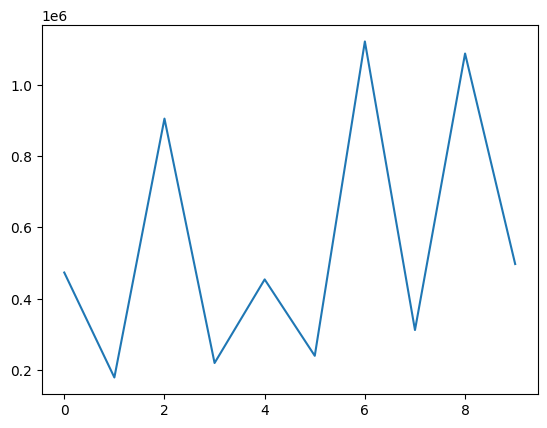

In [54]:
df1s['AMT_CREDIT'].plot.line()

<AxesSubplot:>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexp

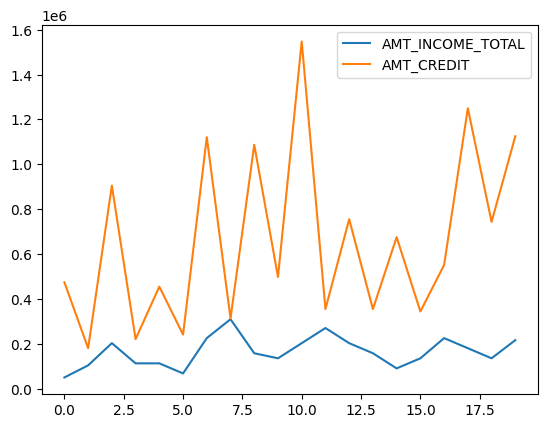

In [55]:
df[['AMT_INCOME_TOTAL', 'AMT_CREDIT']].head(20).plot.line()

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexp

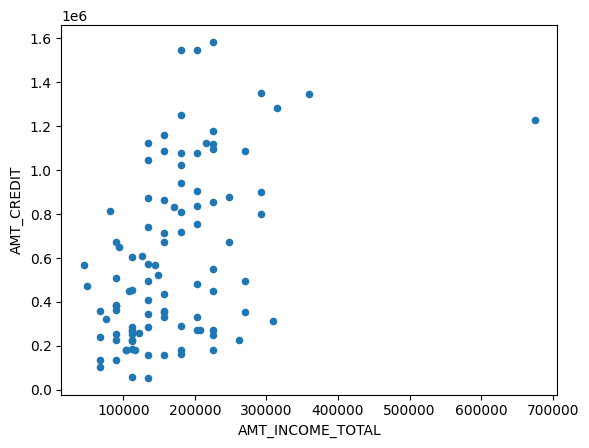

In [57]:
df[['AMT_INCOME_TOTAL', 'AMT_CREDIT']].head(100).plot.scatter(x='AMT_INCOME_TOTAL', y='AMT_CREDIT')

<AxesSubplot:xlabel='CODE_GENDER'>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexp

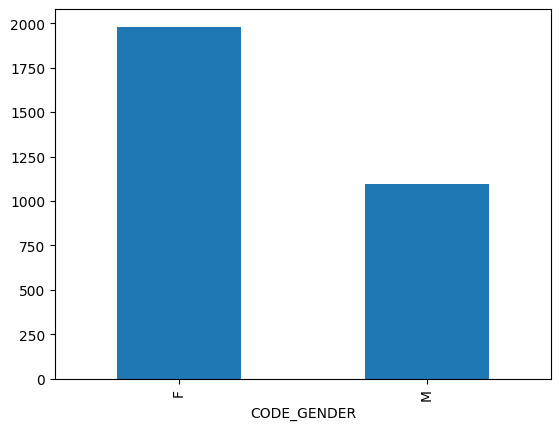

In [59]:
df['CODE_GENDER'].value_counts().plot.bar()

<AxesSubplot:xlabel='OCCUPATION_TYPE'>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexp

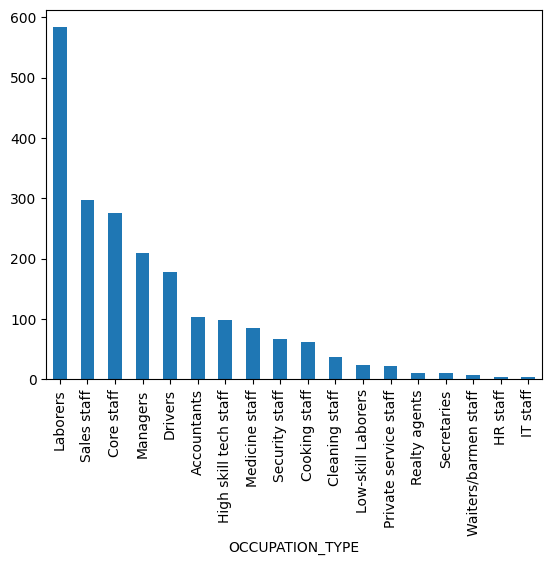

In [60]:
df['OCCUPATION_TYPE'].value_counts().plot.bar()

<AxesSubplot:ylabel='OCCUPATION_TYPE'>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexp

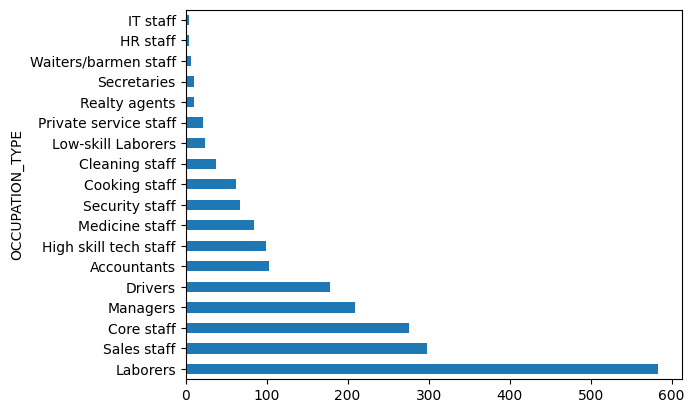

In [61]:
df['OCCUPATION_TYPE'].value_counts().plot.barh()

<AxesSubplot:ylabel='Frequency'>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexp

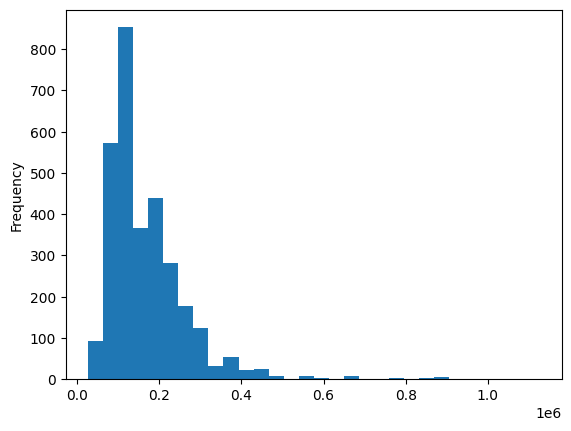

In [63]:
df['AMT_INCOME_TOTAL'].plot.hist(bins=30)

<AxesSubplot:>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexp

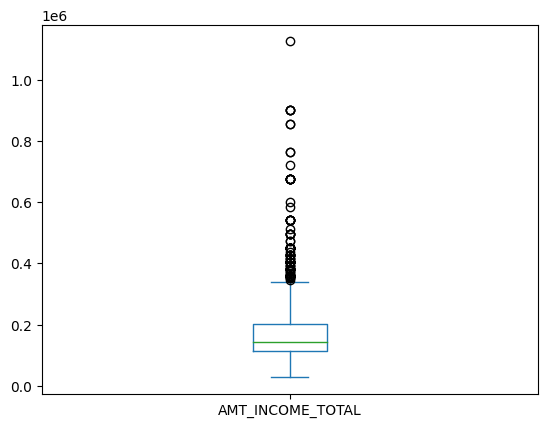

In [64]:
df['AMT_INCOME_TOTAL'].plot.box()

In [67]:
df2['SK_ID_CURR'].value_counts().head(1)

SK_ID_CURR
283368    44
Name: count, dtype: int64

In [69]:
df2['APPROVED'] = (df2['NAME_CONTRACT_STATUS'] == 'Approved')

In [71]:
df3 = pd.merge(left=df[['SK_ID_CURR', 'OCCUPATION_TYPE']], 
         right=df2[['SK_ID_CURR', 'APPROVED']],
         on='SK_ID_CURR')

In [72]:
df3.head()

,SK_ID_CURR,OCCUPATION_TYPE,APPROVED
0,267142,NaN,True
1,267142,NaN,True
2,344230,Core staff,True
3,344230,Core staff,True
4,205422,Drivers,True


In [74]:
df3.groupby('OCCUPATION_TYPE')['APPROVED'].mean().sort_values(ascending=False)

OCCUPATION_TYPE
Secretaries              0.821429
HR staff                 0.818182
Accountants              0.670833
Cooking staff            0.661972
Managers                 0.638024
Medicine staff           0.637838
Waiters/barmen staff     0.629630
Private service staff    0.628205
Low-skill Laborers       0.626506
Drivers                  0.613998
Sales staff              0.606742
Core staff               0.605852
Security staff           0.603878
Laborers                 0.601126
IT staff                 0.600000
High skill tech staff    0.569869
Cleaning staff           0.567010
Realty agents            0.538462
Name: APPROVED, dtype: float64